In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
df = pd.read_csv('/content/online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
from sklearn.preprocessing import LabelEncoder
Label_encoder = LabelEncoder()

In [ ]:
df['VisitorType'] = Label_encoder.fit_transform(df['VisitorType'])
df['Month'] = Label_encoder.fit_transform(df['Month'])

In [ ]:
df['Month'].unique()

array([2, 5, 6, 8, 4, 3, 0, 7, 9, 1])

In [ ]:
df['VisitorType'].unique()

array([2, 0, 1])

In [ ]:
df['Administrative_Duration'] = df['Administrative_Duration'].astype('int')
df['Informational_Duration'] = df['Informational_Duration'].astype('int')
df['ProductRelated_Duration'] = df['ProductRelated_Duration'].astype('int')
df['PageValues'] = df['PageValues'].astype('int')
df['SpecialDay'] = df['SpecialDay'].astype('int')

In [ ]:
df.shape

(12330, 18)

In [ ]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<ipython-input-13-8af862515d24>:11: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for artist in g.legend.legendHandles:


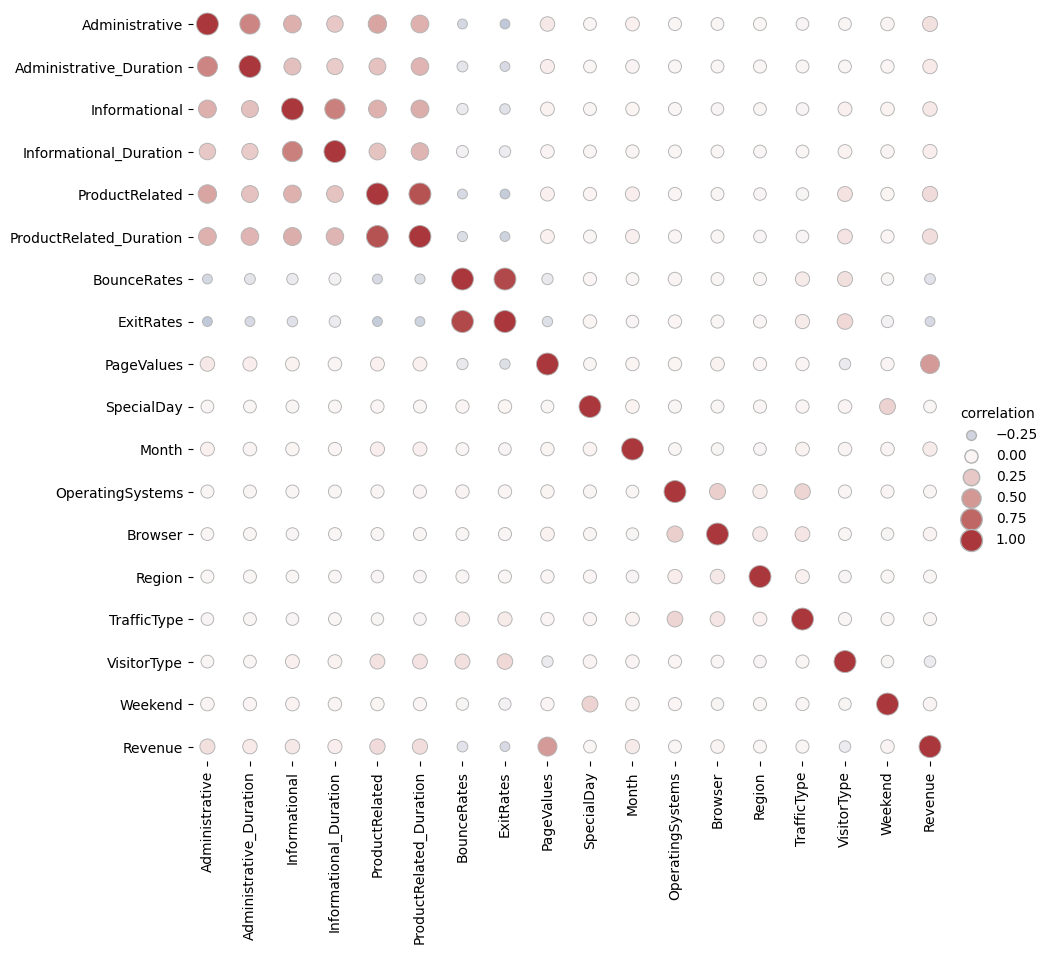

In [ ]:
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(data = corr_mat, x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

(18.5, -0.5)

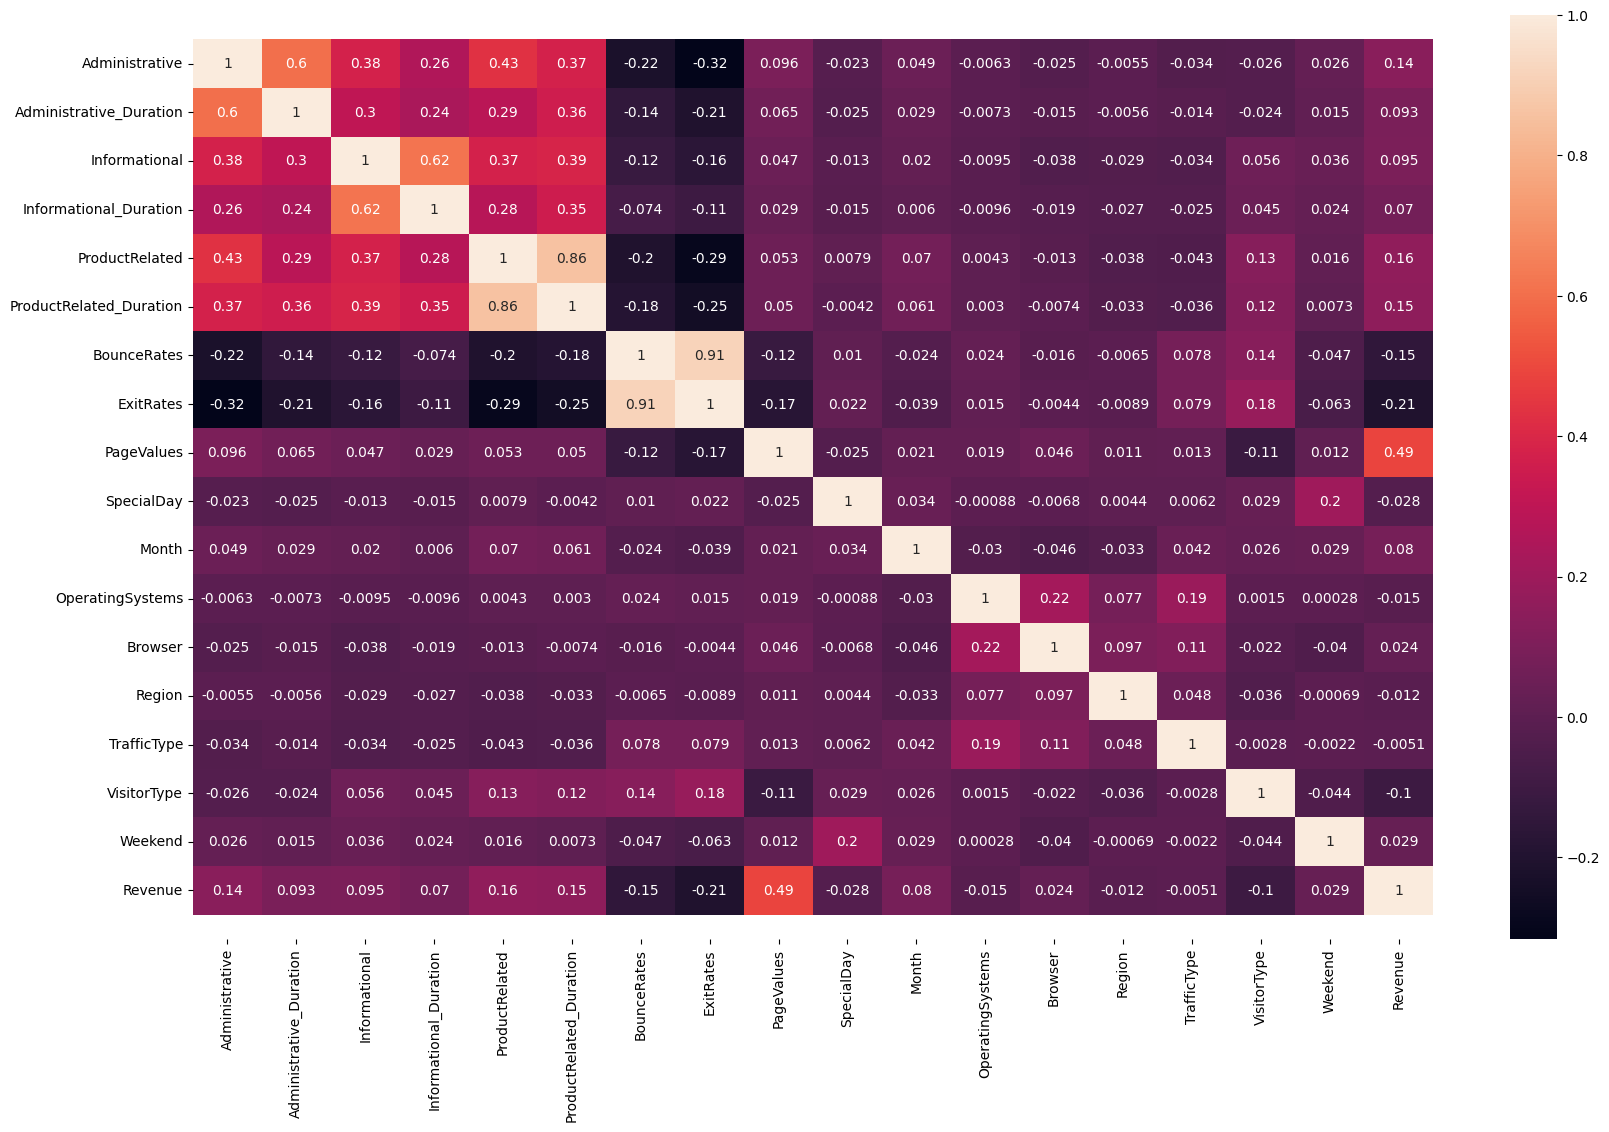

In [ ]:
corr_matrix=df.corr()
plt.figure(figsize=(20,12))
ax = sns.heatmap(corr_matrix, annot = True)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0,0,0,1,0,0.200000,0.200000,0,0,2,1,1,1,1,2,False
1,0,0,0,0,2,64,0.000000,0.100000,0,0,2,2,2,1,2,2,False
2,0,0,0,0,1,0,0.200000,0.200000,0,0,2,4,1,9,3,2,False
3,0,0,0,0,2,2,0.050000,0.140000,0,0,2,3,2,2,4,2,False
4,0,0,0,0,10,627,0.020000,0.050000,0,0,2,3,3,1,4,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145,0,0,53,1783,0.007143,0.029031,12,0,1,4,6,1,1,2,True
12326,0,0,0,0,5,465,0.000000,0.021333,0,0,7,3,2,1,8,2,True
12327,0,0,0,0,6,184,0.083333,0.086667,0,0,7,3,2,1,13,2,True
12328,4,75,0,0,15,346,0.000000,0.021053,0,0,7,2,2,3,11,2,False


In [ ]:
y

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Name: Revenue, Length: 12330, dtype: bool

In [ ]:
fal = df[df['Revenue']==True]
tru = df[df['Revenue']==False]

In [ ]:
df.groupby('Revenue').size()

Revenue
False    10422
True      1908
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
x_sm,y_sm = sm.fit_resample(X_train, y_train)

In [ ]:
df3 = pd.DataFrame(y_sm)
df3['Revenue'].value_counts()

True     7267
False    7267
Name: Revenue, dtype: int64

In [ ]:
fal = df[df['Revenue']==True]
tru = df[df['Revenue']==False]
df.groupby('Revenue').size()

Revenue
False    10422
True      1908
dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predic = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_predic)

In [ ]:
dt_acc

0.8553663152203298

Confusion Matrix - Decision Tree:


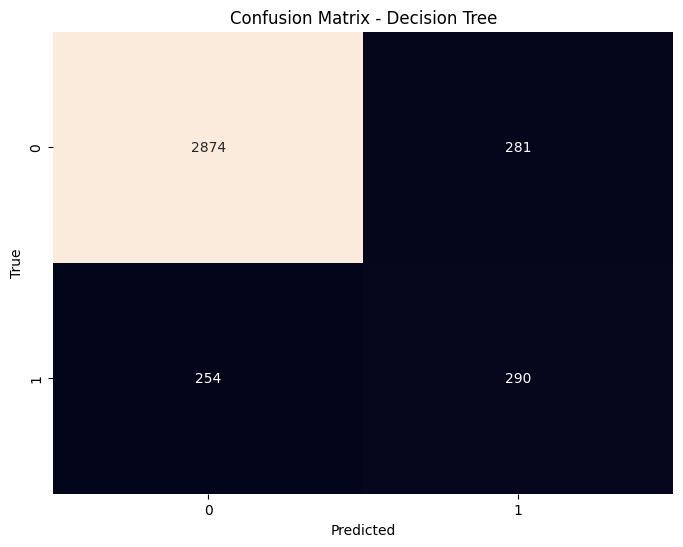

In [ ]:
dt_confusion_matrix = confusion_matrix(y_test, dt_predic)
print("Confusion Matrix - Decision Tree:")
plt.figure(figsize=(8, 6))
sns.heatmap(dt_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
print(classification_report(y_test, dt_predic))

              precision    recall  f1-score   support

       False       0.92      0.91      0.92      3155
        True       0.52      0.54      0.53       544

    accuracy                           0.86      3699
   macro avg       0.72      0.73      0.72      3699
weighted avg       0.86      0.86      0.86      3699

